




#  CLASSIFICATION KAGGLE CASE






Víctor Benito Segura 1597165

#### CARDIOVASCULAR DISEASE DATASET

https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

Github link:
https://github.com/Victorbs18/KAGGLE

### INTRODUCTION

In this project we will analyze a dataset from kaggle 'cardiovascular disease' in order to solve a classification problem. 

We will follow the next steps:

1- Import the libraries that we will use in our project. 

2- Observe our dataset and understand the attributes. 

3- Choose our target feature. 

4- Remove null values and outliers.

5- Do Feature Engineering to create new attributes that can be useful.

6- Perform Correlation Matrix to see the correlations of our attributes.

7- Normalize our data so that our models fit better.

8- Do Feature Selection for reduce the number of features of our dataset.

9- Perform different models.

10- Resume the metrics of each models and decide which one is the best for our data.

11- Show the conclusions of the data analysis project.

## DATA CLEANING

#### INSTALLING LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm,datasets
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
import pandas as pd
import seaborn as sns

#### LOADING THE DATASET

In [2]:
dataset = pd.read_csv('cardio_train.csv',delimiter=';')
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


#### NULL VALUES

In [3]:
print("Tant per cent of null values:")

print((dataset.isnull().sum()/dataset.shape[0])*100)

Tant per cent of null values:
id             0.0
age            0.0
gender         0.0
height         0.0
weight         0.0
ap_hi          0.0
ap_lo          0.0
cholesterol    0.0
gluc           0.0
smoke          0.0
alco           0.0
active         0.0
cardio         0.0
dtype: float64


We can see that our dataset has not null values.

### **DATA TYPE OF EACH ATTRIBUTE**
| Nom | Descripció | Tipus |
|:-:|:--|:-:|
id| ID number.|int
gender| 1-women 2-men.|categorical
height| height in cm of a pacient.|int
weight | weight in kg of a pacient. | int
ap_hi|Systolic blood pressure.| int
ap_lo| Diastolic blood pressure.| int
cholesterol| 1-normal, 2-above normal, 3-well-above-normal.| categorical
gluc| glucosa: 1-normal, 2-above normal, 3-well-above-normal.| categorical
smoke| 1-smoke, 0-doesn't smoke.| dummy
alco| 1-drinks alcohol, 1-doesn't drink alcohol.| dummy
active| 1-is active, 0-is not active.| dummy
cardio| 1-cardiovascular disease, 0-not cardiovascular disease.| dummy

Number of rows of our dataset:

In [4]:
print(dataset.shape[0])

70000


We delete repeated rows:

In [5]:
dataset=dataset.drop_duplicates(keep = 'first')
print(dataset.shape[0])

70000


In this case, we don't have repeated rows so we continue.

#### ATRIBUTTE TRANSFORMATIONS

We transform the **gender** atributte into a dummy: 0-Women, 1-Men.

In [6]:
if (any(dataset['gender']==2)):
    dataset['genderBool'] = dataset['gender']==2

We transform the categorical attribute **cholesterol** using One-Hot-Encoding.

In [7]:
dataset["normal_cholesterol"] = dataset['cholesterol']==1
dataset["above_cholesterol"] = dataset['cholesterol']==2
dataset["well_above_cholesterol"] = dataset['cholesterol']==3

We act by the same way with the attribute **glucosa**.

In [8]:
dataset["normal_gluc"] = dataset['gluc']==1
dataset["above_gluc"] = dataset['gluc']==2
dataset["well_above_gluc"] = dataset['gluc']==3

We transform the attribute **age** into years for a better comprehension.

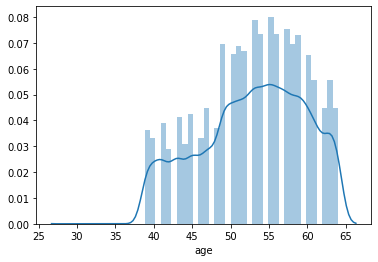

In [9]:
dataset['age'] = dataset['age'].div(365).apply(lambda x: int(x))
fig = sns.distplot(a=dataset['age'], hist=True)

We transform this new attribute age into three new dummy columns for different group ages, young_adult, adult and old.

In [10]:
dataset['young_adult'] = dataset['age'].apply(lambda x: 1 if x < 30 else 0)
dataset['adult'] = dataset['age'].apply(lambda x: 1 if 30 <= x < 55 else 0)
dataset['old'] = dataset['age'].apply(lambda x: 1 if x >= 55 else 0)

### FEATURE ENGINEERING

We will try to create new attributes from our original attributes in order to find strong correlations with the target attribute.

We add the attribute **IBM ('Body Mass Index')** using our attributes weight and height because it may has a strong correlation with the objective attribute **cardio**.

In [11]:
dataset['BMI']=np.round(dataset['weight']/((dataset['height']/100)**2),2)

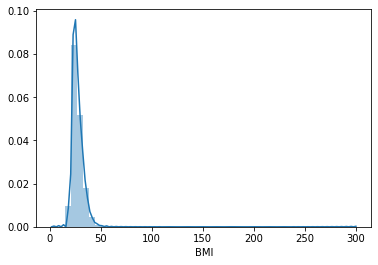

In [12]:
fig = sns.distplot(a=dataset['BMI'], hist=True)

As we did before with age, we transform the BMI attribute in categories:

In [13]:
dataset['underweight'] = dataset['BMI'].apply(lambda x: 1 if x < 18 else 0)
dataset['healthy'] = dataset['BMI'].apply(lambda x: 1 if 18 <= x < 25 else 0)
dataset['overweight'] = dataset['BMI'].apply(lambda x: 1 if 25 <= x < 30 else 0)
dataset['obese'] = dataset['BMI'].apply(lambda x: 1 if 30 <= x < 35 else 0)
dataset['severely_obese'] = dataset['BMI'].apply(lambda x: 1 if 35 <= x < 40 else 0)
dataset['morbidly_obese'] = dataset['BMI'].apply(lambda x: 1 if x >= 40 else 0)

This is how our dataset looks like:

In [14]:
dataset.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,...,young_adult,adult,old,BMI,underweight,healthy,overweight,obese,severely_obese,morbidly_obese
0,0,50,2,168,62.0,110,80,1,1,0,...,0,1,0,21.97,0,1,0,0,0,0
1,1,55,1,156,85.0,140,90,3,1,0,...,0,0,1,34.93,0,0,0,1,0,0
2,2,51,1,165,64.0,130,70,3,1,0,...,0,1,0,23.51,0,1,0,0,0,0
3,3,48,2,169,82.0,150,100,1,1,0,...,0,1,0,28.71,0,0,1,0,0,0
4,4,47,1,156,56.0,100,60,1,1,0,...,0,1,0,23.01,0,1,0,0,0,0
5,8,60,1,151,67.0,120,80,2,2,0,...,0,0,1,29.38,0,0,1,0,0,0
6,9,60,1,157,93.0,130,80,3,1,0,...,0,0,1,37.73,0,0,0,0,1,0
7,12,61,2,178,95.0,130,90,3,3,0,...,0,0,1,29.98,0,0,1,0,0,0
8,13,48,1,158,71.0,110,70,1,1,0,...,0,1,0,28.44,0,0,1,0,0,0
9,14,54,1,164,68.0,110,60,1,1,0,...,0,1,0,25.28,0,0,1,0,0,0


### **FINAL DATATYPE ATTRIBUTES**
| Nom | Descripció | Tipus |
|:-:|:--|:-:|
height| height in cm of a pacient.|int
weight | weight in kg of a pacient. | int
ap_hi|Systolic blood pressure.| int
ap_lo| Diastolic blood pressure.| int
smoke| 1-smoke, 0-doesn't smoke.| dummy
alco| 1-drinks alcohol, 1-doesn't drink alcohol.| dummy
active| 1-is active, 0-is not active.| dummy
genderBool| 0-women 1-men.|dummy
normal_cholesterol| 0-not normal cholesterol, 1-normal cholesterol.| dummy
above_cholesterol| 0-not above cholesterol, 1-above cholesterol.| dummy
well_above_cholesterol| 0-not well above cholesterol, 1- well above cholesterol.| dummy
normal_gluc| 0-not normal glucosa, 1-normal glucosa.| dummy
above_gluc| 0-not above glucosa, 1-above glucosa.| dummy
well_above_gluc| 0-not well above glucosa, 1- well above glucosa.| dummy
young_adult | 0-not young adult, 1-young adult.(18,30) | dummy
adult | 0-not adult, 1- adult. (30,55) | dummy
old | 0-not old, 1- old. (>55)| dummy
underweight | 0-not healthy, 1-healthy BMI (18,25).| dummy
overweight | 0-not overweight, 1-overweight (25,30).| dummy
obese | 0-not obese, 1-obese BMI (30,35) | dummy
severely_obese | 0-not severely_obese, 1-severely_obese BMI (35,40)| dummy
morbidly_obese | 0-not morbidly_obese, 1-morbidly_obese BMI (>40) | dummy
cardio| 1-cardiovascular disease, 0-not cardiovascular disease.| dummy

In [15]:
colX =  [i for i in dataset.columns if i not in ['id','gender','cholesterol','gluc','BMI','age','cardio']] 
colXY= [i for i in dataset.columns if i not in ['id','gender','cholesterol','gluc','BMI','age',]] 
print('Columns from X that we will use: \n',colX)
print("\nTarget attribute: 'cardio'")
X = np.array(dataset)
y = np.array(dataset['cardio'])


Columns from X that we will use: 
 ['height', 'weight', 'ap_hi', 'ap_lo', 'smoke', 'alco', 'active', 'genderBool', 'normal_cholesterol', 'above_cholesterol', 'well_above_cholesterol', 'normal_gluc', 'above_gluc', 'well_above_gluc', 'young_adult', 'adult', 'old', 'underweight', 'healthy', 'overweight', 'obese', 'severely_obese', 'morbidly_obese']

Target attribute: 'cardio'


#### CORRELATION MATRIX

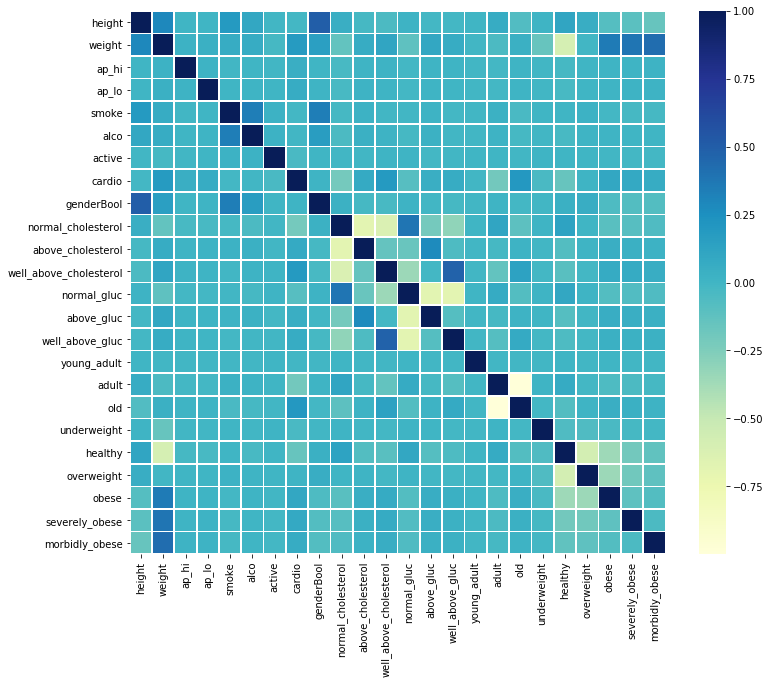

In [16]:
correlation = dataset[colXY].corr()

plt.figure(figsize=(12, 10))

ax = sns.heatmap(correlation, annot=False, linewidths=.7,cmap="YlGnBu")

Only strong (positive and negative) correlations:

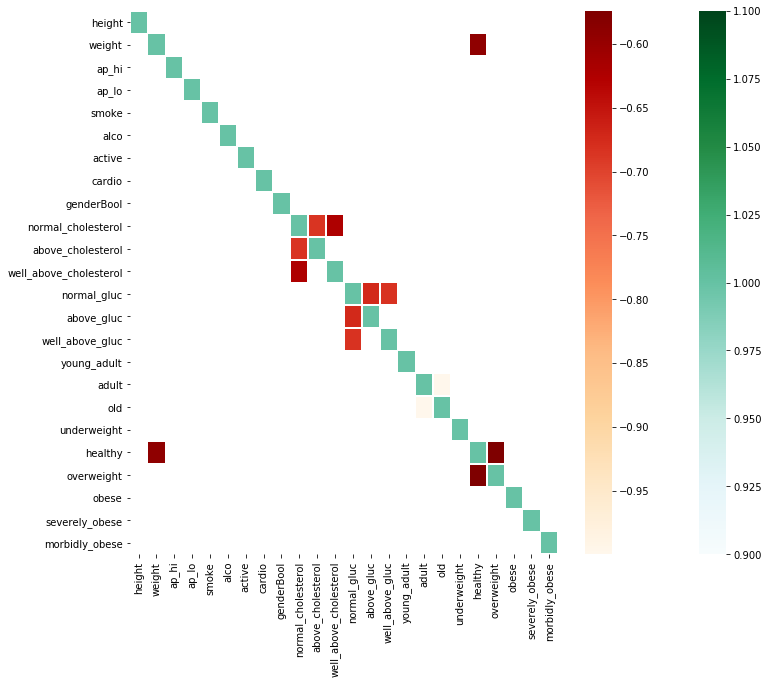

In [17]:
plt.figure(figsize=(12, 10))

ax = sns.heatmap(correlation[correlation>0.5], annot=False, linewidths=.7,cmap="BuGn")
ax = sns.heatmap(correlation[correlation<-0.5], annot=False, linewidths=.7,cmap="OrRd")


We can see the relations between weight and healthy, it's an expected relationship because healthy is a category from BMI and we use weight for BMI calculation. We can also see the correlations between different cholesterol categories, and also the correlations between glucose categories.

### TARGET ATTRIBUTE 

The attribute that we would like classificate is **cardio**. We have chosen this attribute because it is an interesting attribute to classificate, we would like to know which patients have a cardiovascular disease and which of our attributes are more influent in a cardiovascular disease. Moreover, the kaggle dataset "Cardiovascular disease dataset it is oriented to choose this target attribute.

#### CORRELATION OF THE ATTRIBUTES WITH THE TARGET VALUE

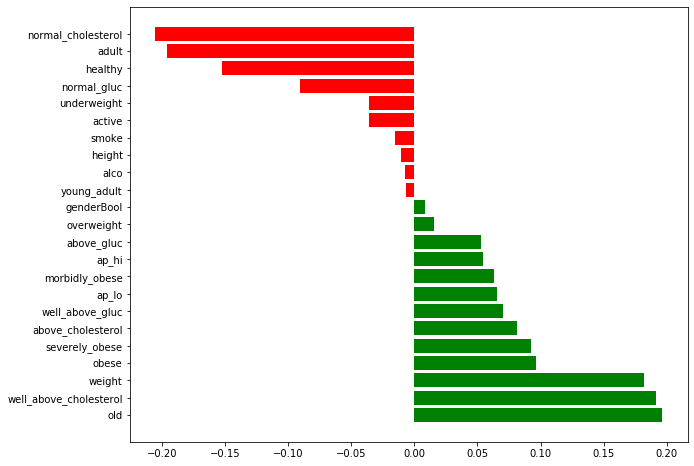

In [18]:
correlation = dataset[colXY].corr()
cardio_corr = correlation['cardio']
cardio_corr= cardio_corr.drop('cardio',axis=0)
sorted_corr = cardio_corr.sort_values(ascending=False)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
ax.barh(y=sorted_corr.index[sorted_corr.values > 0], width=sorted_corr.values[sorted_corr.values > 0],color='green')
ax.barh(y=sorted_corr.index[sorted_corr.values < 0], width=sorted_corr.values[sorted_corr.values < 0],color='red')
plt.show()


The attributes that are more strongly related with **'cardio'** are **old, well_above_cholesterol and weight**. These results make sense because old people is more likely to have cardio diseases, as well as people with high cholesterol and much weight.
On the other hand, the features that are more negatively related with **'cardio'** are **normal_cholesterol, adult and healthy**. This also fits us because, usually if an adult has a normal cholesterol and a healthy BMI is less prone to cardiovascular disease.

In [19]:
print(len(colX))

23


#### DISTRIBUTION OF THE ATRIBUTTES

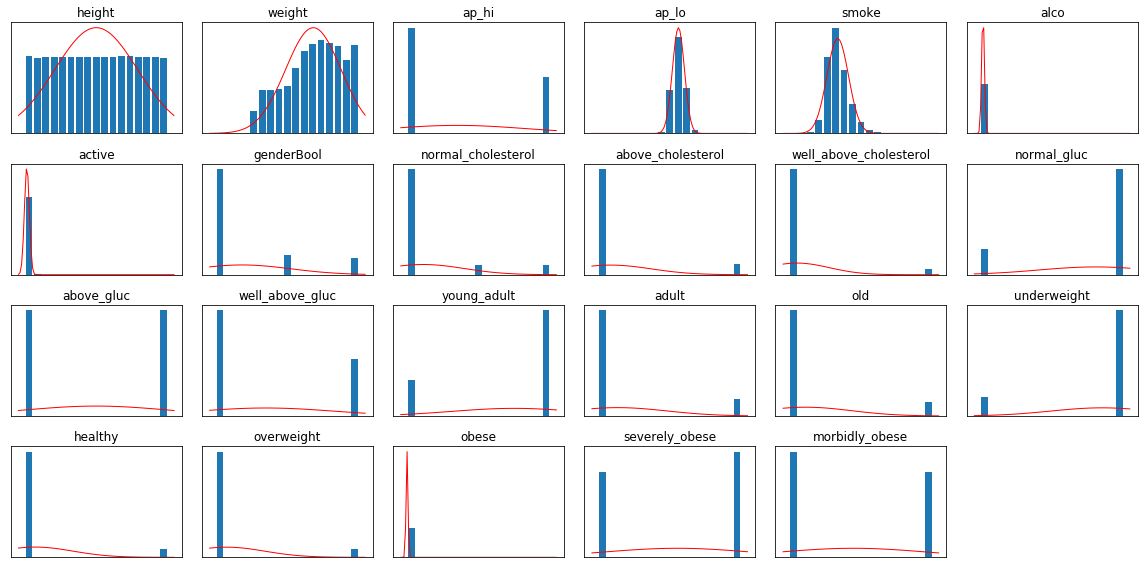

In [20]:
from scipy.stats import norm
fig = plt.figure(figsize=(16, 8))

for i in range(23):
    xi = X[:,i]
    xi = xi.astype(float)
    plt.subplot(4,6, i+1)
    plt.hist(xi, bins=17, range=[np.nanmin(xi), np.nanmax(xi)],density=True, histtype="bar", rwidth=0.8)
    plt.title(colX[i])

    xi = xi[~np.isnan(xi)]
    mu, std = norm.fit(xi) 
    xmin, xmax = plt.xlim()
    xh = np.linspace(xmin, xmax, 100)
    p = norm.pdf(xh, mu, std)
    plt.plot(xh, p, 'k', linewidth=1,color='r')
        
    g = plt.gca()
    g.axes.get_xaxis().set_visible(False)
    g.axes.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

### OUTLIERS

We will try to find outliers in our numeric attributes: 'weight', 'height', 'ap_hi','ap_lo'

In [21]:
contX =  [i for i in dataset.columns if i in ['height','weight','ap_hi','ap_lo']] 

Let's see our attribute characteristics:

Numerical attributes stats:

In [22]:
dataset[contX].describe()

,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000
mean,164.359229,74.205690,128.817286,96.630414
std,8.210126,14.395757,154.011419,188.472530
min,55.000000,10.000000,-150.000000,-70.000000
25%,159.000000,65.000000,120.000000,80.000000
50%,165.000000,72.000000,120.000000,80.000000
75%,170.000000,82.000000,140.000000,90.000000
max,250.000000,200.000000,16020.000000,11000.000000


**height**: We observe that height goes from 0.55 meters to 2.50 meters, although according to historical values this extrem results could be real, they are very strange values which don't represent our society so we will delete them.

**weight**: Acting by the same way as height we will eliminate this extreme values.

**ap_hi**: systolic blood pressure has to be positive. Over 150 are cases of hypertension crisis.

**ap_lo**: diastolic blood pressure has to be positive. Over 120 are cases of hypertension crisis.

#### NUMERICAL ATTRIBUTES BOXPLOT

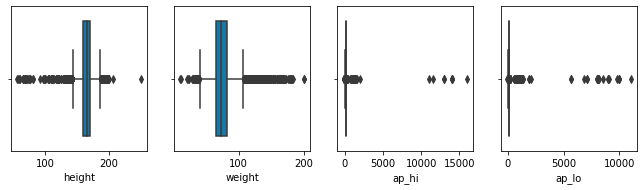

In [23]:
fig = plt.figure(figsize=(20,25))

for i in range(len(contX)):
    plt.subplot(8,7,i+2)
    sns.boxplot(x=contX[i], data=dataset, palette='winter')

In [24]:
dC= dataset
dC.shape[0]

70000

**DETECTION OF OUTLIERS**

In [25]:
def detect_outliers(dC, drop = False):
    for col in dC.columns:
        Q1 = np.percentile(dC[col], 25) 
        Q3 = np.percentile(dC[col], 75) 
        IQR = Q3-Q1 
        outlier_step = IQR * 1.5 
        outliers = dC[col][~((dC[col] >= Q1 - outlier_step) & (dC[col] <= Q3 + outlier_step))].index.tolist()  
        print('For the feature {}, No of Outliers is {}'.format(col, len(outliers)))
        
detect_outliers(dC[['height','weight','ap_hi','ap_lo']])

For the feature height, No of Outliers is 519
For the feature weight, No of Outliers is 1819
For the feature ap_hi, No of Outliers is 1435
For the feature ap_lo, No of Outliers is 4632


We observe that if we use Tukey method we have got so many outliers so we are going to trait them one by one.

#### **REMOVE OUTLIERS FROM height and weight**

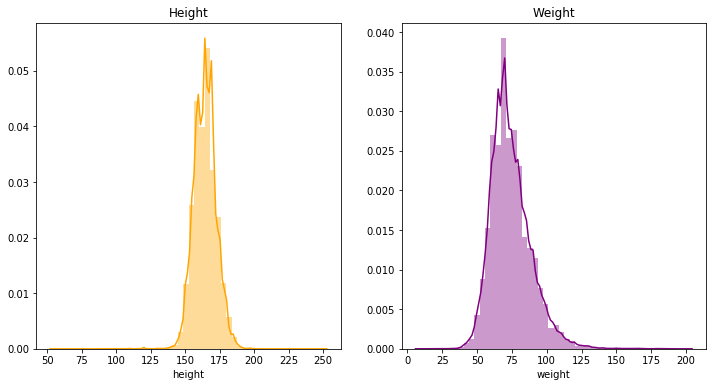

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.distplot(ax=ax[0], a=dC['height'], hist=True,color='orange').title.set_text('Height')
sns.distplot(ax=ax[1],a=dC['weight'], hist=True,color='purple').title.set_text('Weight')
plt.show()

In this case, the attribute extreme values seem to be outliers 0,55m and 2.50m are the extremes as we said before. 
If we delete the outliers with the Tukey method we will loose too much information so we will try different methods to reduce the number of deleted values.

We will transform height and weight with a log function in order to reduce extreme values. There is no problem because all the values are over 0.

In [27]:
dC[['height','weight']]=np.log(dC[['height','weight']])
detect_outliers(dC[['height','weight']])

For the feature height, No of Outliers is 484
For the feature weight, No of Outliers is 1174


We have already reduced some datasets without loosing information but we would like to reduce even more the outliers so we continue.

We define 0.005 and 0.995 Quantile range to handle the remaining outliers

In [28]:
dC = dC[(dC['weight'] > dC['weight'].quantile(0.005)) & (dC['weight'] < dC['weight'].quantile(0.995))]
dC = dC[(dC['height'] > dC['height'].quantile(0.005)) & (dC['height'] < dC['height'].quantile(0.995))]
detect_outliers(dC[['height', 'weight']])

For the feature height, No of Outliers is 0
For the feature weight, No of Outliers is 349


**REMOVE OUTLIERS FROM ap_hi and ap_lo**

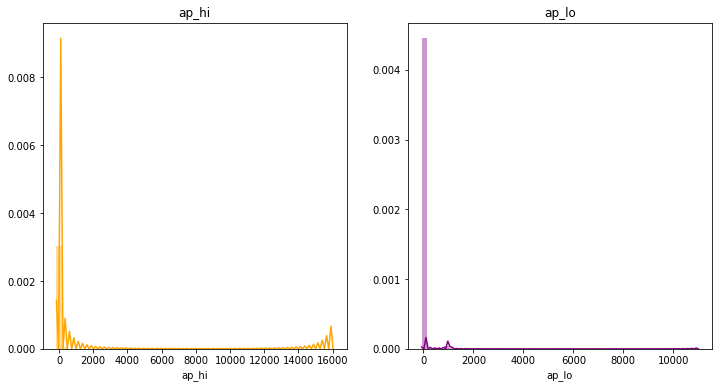

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.distplot(ax=ax[0], a=dC['ap_hi'], hist=True,color='orange').title.set_text('ap_hi')
sns.distplot(ax=ax[1],a=dC['ap_lo'], hist=True,color='purple').title.set_text('ap_lo')
plt.show()

ap_hi: systolic blood pressure has to be positive.
ap_lo: diastolic blood pressure has to be positive.

In [30]:
dC = dC[(dC['ap_hi'] > 0 )]
dC = dC[(dC['ap_lo'] > 0) ]
detect_outliers(dC[['ap_hi', 'ap_lo']])

For the feature ap_hi, No of Outliers is 1353
For the feature ap_lo, No of Outliers is 4416


If we observe the values for ap_hi and ap_lo we observe that values above 150 and 120 respectively are cases of hypertension crisis. As well as we have got values over 16020.000000 and 11000.000000 repsectively that are clearly errors. We will delete all the values over 250 for ap_hi and 200 for ap_lo.  

In [31]:
dC = dC[(dC['ap_hi'] < 250)] 
dC = dC[(dC['ap_lo'] < 200)]
detect_outliers(dC[['ap_hi', 'ap_lo']])

For the feature ap_hi, No of Outliers is 1188
For the feature ap_lo, No of Outliers is 3494


In [32]:
dC.shape[0]

67394

We have deleted the outliers of our attributes only deleting 3.7% of our data.

In [33]:
(1-(dC.shape[0]/dataset.shape[0]))*100

3.722857142857139

#### TRANSFORM OUR DATASET INTO DATA

In [34]:
print(dC.columns)

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio',
       'genderBool', 'normal_cholesterol', 'above_cholesterol',
       'well_above_cholesterol', 'normal_gluc', 'above_gluc',
       'well_above_gluc', 'young_adult', 'adult', 'old', 'BMI', 'underweight',
       'healthy', 'overweight', 'obese', 'severely_obese', 'morbidly_obese'],
      dtype='object')


In [35]:
colX =  [i for i in dC.columns if i not in ['id','gender','cholesterol','gluc','BMI','age','cardio']] 
colXY= [i for i in dC.columns if i not in ['id','gender','cholesterol','gluc','BMI','age',]] 
print('Columns that we will use: ',colX)
X = np.array(dC[colX])
y = np.array(dC['cardio'])
X.shape

Columns that we will use:  ['height', 'weight', 'ap_hi', 'ap_lo', 'smoke', 'alco', 'active', 'genderBool', 'normal_cholesterol', 'above_cholesterol', 'well_above_cholesterol', 'normal_gluc', 'above_gluc', 'well_above_gluc', 'young_adult', 'adult', 'old', 'underweight', 'healthy', 'overweight', 'obese', 'severely_obese', 'morbidly_obese']


(67394, 23)

## DATA NORMALIZATION

It is always a good praxis normalize our data, specially if in the future we would like to use different models as super vector machines which is our case.


In [36]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

mm = make_pipeline(preprocessing.StandardScaler(), preprocessing.Normalizer())

X_scaled = mm.fit_transform(X)

#### DISTRIBUTION OF THE NORMALIZED ATTRIBUTES

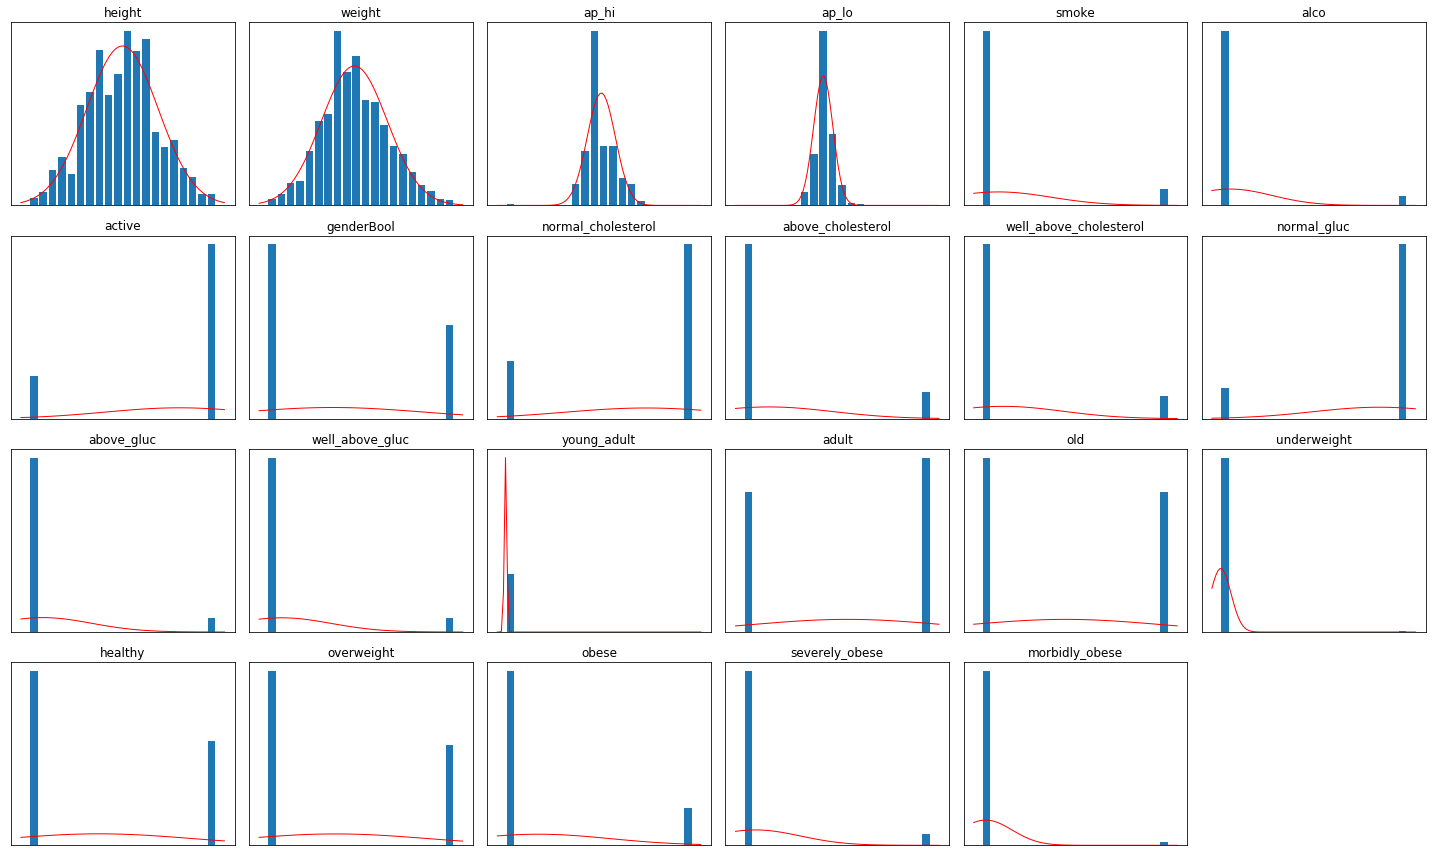

In [37]:
from scipy.stats import norm
fig = plt.figure(figsize=(20, 12))

for i in range(23):
    xi = X[:,i]
    xi = xi.astype(float)
    plt.subplot(4,6, i+1)
    plt.hist(xi, bins=20, range=[np.nanmin(xi), np.nanmax(xi)],density=True, histtype="bar", rwidth=0.8)
    plt.title(colX[i])

    xi = xi[~np.isnan(xi)]
    mu, std = norm.fit(xi) 
    xmin, xmax = plt.xlim()
    xh = np.linspace(xmin, xmax, 100)
    p = norm.pdf(xh, mu, std)
    plt.plot(xh, p, 'k', linewidth=1,color='r')
        
    g = plt.gca()
    g.axes.get_xaxis().set_visible(False)
    g.axes.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

## FEATURE SELECTION

The objective now is to reduce the number of attributes of our dataset and conserve just that ones who are related with the target value 'cardio'

**RECURSIVE FEATURE ELIMINATION (RFE)**

We are going to use the RFE to find the best number of features that generate the highest accuracy for our dataset.

We will use LogisticRegression with k=7 in order to do the RFE.

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

mod = LogisticRegression()
rfe = RFE(mod)
scores = cross_val_score(rfe, X_scaled, y, cv=7)
optimal_num_features = scores.argmax() + 1

rfe = RFE(mod, optimal_num_features)
X_selected_RFE = rfe.fit_transform(X_scaled, y)
best_accuracy = np.max(scores)
print("Best accuracy:", best_accuracy)

Best accuracy: 0.7297465724968841


In [39]:
selected_features_RFE = rfe.get_support(indices=True)
feature_names_RFE = dC[colX].columns[selected_features_RFE]
print(feature_names_RFE)

Index(['ap_hi', 'well_above_cholesterol', 'old'], dtype='object')


If we did a RFE we obtain a model with just 3 attributes: 'ap_hi', 'well_above_cholesterol' and 'old'. With an accuracy for LogisticRegression of 73%

#### PCA COMPONENT

We would like to transform our 23 attributes into just 2 which would be a combination of the other attributes. Having a model of only 2 attributes let us visualization

2


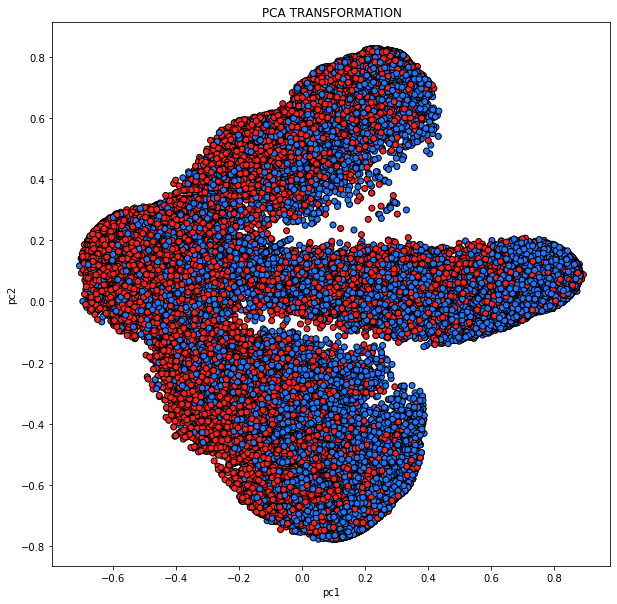

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(X_scaled)
pc = pca.transform(X_scaled)
nc = int(pca.n_components_)
print(nc)
pc1 = pc[:,0]
pc2 = pc[:,1]
plt.figure(figsize=(10,10))
colour = ['#ff2121' if y == 1 else '#2176ff' for y in dC['cardio']]
plt.scatter(pc1,pc2 ,c=colour,edgecolors='#000000')
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.title("PCA TRANSFORMATION")
plt.show()

The benefits of performing a PCA, as shown in the scatter plot of classes, is to reduce the initial data set to a two-dimensional data set that retains the essential information.

In [41]:
model = LogisticRegression()
model.fit(pc, y)
scores = cross_val_score(model, pc, y, cv=7)
print("Accuracy",scores.mean())

Accuracy 0.6622399639128983


#### TSNE

TSNE instance with 2 dimensions

In [42]:
from sklearn.manifold import TSNE

TSNE it is a computationally expensive technique especially when the dataset is big (our case). We will not use this technique but we will have a visualization of TSNE of a part of our data.

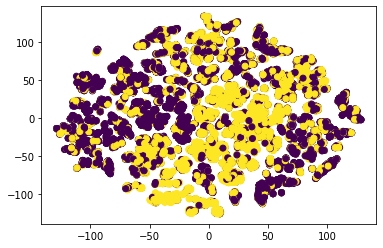

In [43]:
tsne = TSNE(n_components=2,learning_rate=1000)
X_reduct= X[:20000, :]
y_reduct = y[:20000]
X_tsne = tsne.fit_transform(X_reduct)
x1 = X_tsne[:,0]
x2 = X_tsne[:,1]
plt.scatter(x1, x2, c=y_reduct)
plt.show()

In [44]:
model = LogisticRegression()
model.fit(X_tsne, y_reduct)
scores = cross_val_score(model, X_tsne, y_reduct, cv=7)
print("Accuracy",scores.mean())

Accuracy 0.5892996714216397


#### LASSO

In [45]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_scaled, y)

print(model.coef_)

[-0.  0.  0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0.
 -0.  0.  0.  0.  0.]


Lasso set all coefficients, the penalty is too high for our model so we reduce the parameter alpha from 1 (default value) to 0.

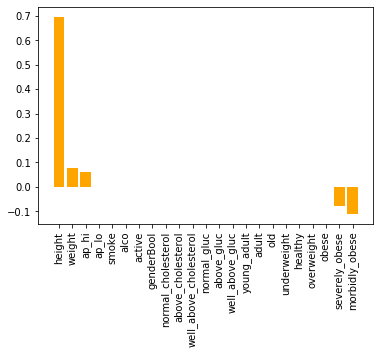

In [46]:
model = Lasso(alpha=0.01)
model.fit(X_scaled, y)
coefs=model.coef_
sorted_coefs = sorted(coefs, reverse=True)
plt.bar(range(len(sorted_coefs)), sorted_coefs, color='orange')
plt.xticks(range(len(sorted_coefs)), dC[colX].columns, rotation=90)
plt.show()

Lasso indicate us that the most related features with target feature are: height, weight, ap_hi, severely_obese, morbidly_obese.
severely_obese, mordibly_obese have negative relationship with the target attribute.

In [47]:
X_scaled_lasso= np.array(dC[['height', 'weight', 'ap_hi', 'severely_obese', 'morbidly_obese']])

In [48]:
Lasso= LogisticRegression()
Lasso.fit(X_scaled_lasso,y)
scores = cross_val_score(Lasso, X_scaled_lasso, y, cv=7)
print("Accuracy",scores.mean())

Accuracy 0.7113540379929456


#### POLYNOMIAL FEATURES

In [49]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

X_poly = poly.fit_transform(X_scaled)

print(X_poly.shape)

(67394, 299)


The number of columns increase a lot, from 23 to 299 so we reject this option.

#### SELECTKBEST

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import cross_val_score

best_score = 0
best_features = None

for k in range(1, X_scaled.shape[1] + 1):
    
    selector = SelectKBest(f_classif, k=k)
    X_new = selector.fit_transform(X_scaled, y)

    scores = cross_val_score(LogisticRegression(), X_new, y, cv=7)

    if scores.mean() > best_score:
        best_score = scores.mean()
        best_features = X_new
        selected_features = selector.get_support()

num_selected = sum(selected_features)
print("Number of selected features: %d" % num_selected)
print("Selected feature names:\n")
for i in range(len(selected_features)):
    if selected_features[i]==True:
        print(dC[colX].columns[i])
print("Accuracy: %0.2f" % best_score)

Number of selected features: 23
Selected feature names:

height
weight
ap_hi
ap_lo
smoke
alco
active
genderBool
normal_cholesterol
above_cholesterol
well_above_cholesterol
normal_gluc
above_gluc
well_above_gluc
young_adult
adult
old
underweight
healthy
overweight
obese
severely_obese
morbidly_obese
Accuracy: 0.73


FinsBestK select all the features, so let's select just the 5 best features.

In [51]:
best_score = 0
best_features = None

for k in range(1, X_scaled.shape[1] + 1):
    
    selector = SelectKBest(f_classif, k=5)
    X_new = selector.fit_transform(X_scaled, y)

    scores = cross_val_score(LogisticRegression(), X_new, y, cv=7)

    if scores.mean() > best_score:
        best_score = scores.mean()
        best_features = X_new
        selected_features = selector.get_support()

num_selected = sum(selected_features)
print("Number of selected features: %d" % num_selected)
print("Selected feature names:\n")
for i in range(len(selected_features)):
    if selected_features[i]==True:
        print(dC[colX].columns[i])
print("Accuracy: %0.3f" % best_score)

Number of selected features: 5
Selected feature names:

ap_hi
ap_lo
normal_cholesterol
well_above_cholesterol
adult
Accuracy: 0.725


We observe that with this reduced model with just 5 attributes we have an accuracy of 72% which is just 1% lower that the accuracy which produces the full model.

#### FEATURE SELECTION DECISION

We have seen different methods for feature selection. Most popular methods like PCA and TSNE doesn't fit very well with our dataset because our general accuracy is low and we can't loose more accuracy reducting a lot of features, these methods could work so much well with datasets with a lot of features and a high general accuracy. 
The feature selection methods that worked better with  our dataset where FindBestK with k=5, Lasso and RFE.
We choose RFE with k=7 because produced the highest accuracy.

In [156]:
# X with feature selection RFE
# X_scaled= X_selected_RFE
X= np.array(dC[colX])
mm = make_pipeline(preprocessing.StandardScaler(), preprocessing.Normalizer())
X_scaled = mm.fit_transform(X)
print(X_scaled.shape)

(67394, 23)


### FIND THE BEST K-FOLD FOR CROSS VALIDATION

In [157]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
folds = range(2, 10)
Acc={}
for k in folds:
    cv = KFold(n_splits=k, shuffle=True, random_state=50)
    model = LogisticRegression()
    scores = cross_val_score(model, X_scaled, y, scoring='accuracy', cv=cv)
    accuracy= np.mean(scores)
    Acc[k] = accuracy
    print("KFold with k=",k,"Accuracy: ",accuracy)

print("Best k for KFold is: ",max(Acc, key=Acc.get))

KFold with k= 2 Accuracy:  0.7264593287236252
KFold with k= 3 Accuracy:  0.7261031973023776
KFold with k= 4 Accuracy:  0.7263108949206788
KFold with k= 5 Accuracy:  0.7265482931074758
KFold with k= 6 Accuracy:  0.7264740769717736
KFold with k= 7 Accuracy:  0.7266373003061065
KFold with k= 8 Accuracy:  0.7266966238189037
KFold with k= 9 Accuracy:  0.7268153587908672
Best k for KFold is:  9


### CLASSIFICATION MODELS

First of all we observe that our dataset is balanced which is a very good aspect that makes our work so much easy.

In [158]:
dC[dC['cardio']==1].shape[0] / dC.shape[0]*100

49.4569249488085

Preparing the dataset to modelling

We are going to use 80% of our data to train and 20% to test.

In [159]:
from sklearn.model_selection import train_test_split

# split the data using a split ratio of 80/20
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# print the size of the train and test datasets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(53915, 23) (53915,)
(13479, 23) (13479,)


### MODELS

### TRAIN THE MODELS

### 1 - LOGISTIC REGRESSION

**LogisticRegression:** Logistic regression is a linear model that estimates the probability of a binary outcome, based on a linear combination of the input features. Logistic regression is widely used for binary classification tasks, such as predicting the likelihood of a customer churning or defaulting on a loan.

#### TUNING HYPERPARAMETERS

For each model, we will tune their hyperparameters in other to optimize the accuracy. In this case, for Logistic Regression we have 2 hyperparameters: C  is a hyperparameter that determines the strength of regularization and solver is the algorithm that is used to find the optimal values for the model's coefficients.

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic = LogisticRegression()
hyperparameters = {
    "C": [0.1, 1.0, 10.0],
    "solver": ["lbfgs", "liblinear"]
}
grid = GridSearchCV(logistic, hyperparameters, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)
print(grid.best_params_)

{'C': 1.0, 'solver': 'lbfgs'}


#### METRICS

In [161]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, precision_recall_curve, average_precision_score, roc_curve, auc
import time
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve
name= 'Logistic Regression'
start = time.time()
model= LogisticRegression(C= 1.0, solver='lbfgs')
scores = cross_val_score(model, X_train, y_train, cv=5,scoring='accuracy')
train_acc = np.mean(scores)
y_pred = cross_val_predict(model, X_test, y_test, cv=5)
test_acc= accuracy_score(y_test, y_pred)
recall= recall_score(y_test, y_pred,average=None)
precision=precision_score(y_test, y_pred,average=None)
F1= f1_score(y_test, y_pred,average=None)
average_precision= average_precision_score(y_test,y_pred)
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)
total = time.time() - start


headers = ["Model", "Train Accuracy", "Test Accuracy", "Recall","Precision","F1","Average precision", "Elapsed Time"]

data_log = [name, "{:.3}".format(train_acc), "{:.3}".format(test_acc), "{:.3} {:.3}".format(recall[0],recall[1]),
        "{:.3} {:.3}".format(precision[0],precision[1]), "{:.3} {:.3}".format(F1[0],F1[1]),
        "{:.3}".format(average_precision), "{:.4}".format(total)]


print("{:<18} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10} ".format(*headers))  
print("{:<18} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10}".format(*data_log))  

Model              Train Accuracy  Test Accuracy   Recall       Precision    F1           Average precision  Elapsed Time 
Logistic Regression 0.726           0.728           0.767 0.689  0.713 0.745  0.739 0.716  0.668              1.575     


#### CONFUSION MATRIX

Text(0.5, 1, 'Logistic Regression')

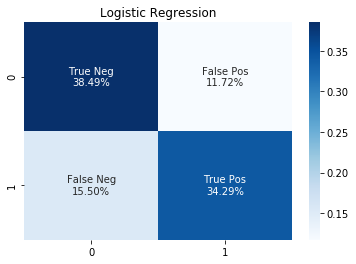

In [162]:
cm = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm/np.sum(cm), xticklabels=["0", "1"], yticklabels=["0", "1"],annot=labels,
            fmt='',cmap='Blues').set_title(name,fontsize=12)

**Confusion Matrix Anlaysis:** we observe that we have a general accuracy of 72.78%. During our classification we predict with a precision of TP/ TP + FP = 0.74 and a recall of TP / TP + FN = 0.69. In general, our classification is similar for both classes 'cardio' and no 'cardio'. 
Observing the other metrics, we can see that we usually perform with better precision for positive cases and with a better recall for negative cases. This means that we make more mistakes predicting negative cases but we predict correctly a higher percentage of total non-cardio cases  

#### CURVES

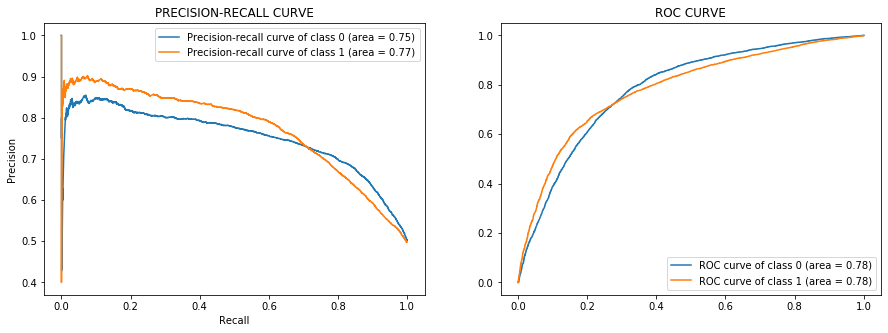

In [163]:
fig, ax = plt.subplots(1, 2,figsize=(15, 5))
n_classes=2
precision = {}
recall = {}
average_precision = {}
# Plot precision-recall curve on the first subplot
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test==i, probs[:, i])
    average_precision[i] = average_precision_score(y_test==i , probs[:, i])
    ax[0].plot(recall[i], precision[i],
               label='Precision-recall curve of class {0} (area = {1:0.2f})'
                     ''.format(i, average_precision[i]))
ax[0].set_xlabel('Recall')
ax[0].set_ylabel('Precision')
ax[0].set_title('PRECISION-RECALL CURVE')
ax[0].legend(loc="upper right")
fpr = {}
tpr = {}
roc_auc = {}
# Plot ROC curve on the second subplot
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    ax[1].plot(fpr[i], tpr[i],
               label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(i, roc_auc[i]))
ax[1].set_title('ROC CURVE')
ax[1].legend()

**Precision-Recall Curve:** A precision-recall curve is a graphical representation of the performance of a binary classifier. In a precision-recall curve, the precision is plotted on the y-axis and the recall is plotted on the x-axis. In 
our case the Precision Recall Curve indicates us that the classifier has relatively high precision and recall for both classes. This would suggest that the classifier is able to accurately identify positive and negative cases a high percentage of the time. 

**(ROC) curve** : is a graphical representation of the performance of a binary classifier. In a ROC curve, the true positive rate is plotted on the y-axis and the false positive rate is plotted on the x-axis. In this case, our Roc Curve indicates us that the classifier has a relatively high true positive rate and a relatively low false positive rate. This would suggest that the classifier is able to accurately identify positive cases a high percentage of the time, while also minimizing the number of false positives.

### 2- SUPER VECTOR MACHINES

**Support Vector Machines**: Support vector machines (SVMs) are a class of supervised learning algorithms that learn a hyperplane that maximally separates the classes in the training data. SVMs are widely used for binary and multi-class classification tasks, especially when the data is not linearly separable.

#### TUNING HYPERPARAMETERS

In [164]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC
import warnings
warnings.simplefilter("ignore")
hyperparameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                       'tol': [1e-3, 1e-4, 1e-5]}

randomized_search = RandomizedSearchCV(LinearSVC(), param_distributions=hyperparameters, n_iter=18, cv=3)
randomized_search.fit(X_train, y_train)

print("Best parameters: {}".format(randomized_search.best_params_))

Best parameters: {'tol': 0.001, 'C': 10}


#### METRICS

In [165]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
name= 'Linear SVC'
start = time.time()
model = LinearSVC(tol=0.001,C=10)
scores = cross_val_score(model, X_train, y_train, cv=5,scoring='accuracy')
train_acc = np.mean(scores)
y_pred = cross_val_predict(model, X_test, y_test, cv=5)
test_acc= accuracy_score(y_test, y_pred)
recall= recall_score(y_test, y_pred, average=None)
precision=precision_score(y_test, y_pred, average=None)
F1= f1_score(y_test, y_pred, average=None)
average_precision= average_precision_score(y_test,y_pred)
calibrated = CalibratedClassifierCV(LinearSVC(tol=0.001,C=0.1))
calibrated.fit(X_train, y_train)
probs = calibrated.predict_proba(X_test)
total = time.time() - start


headers = ["Model", "Train Accuracy", "Test Accuracy", "Recall","Precision","F1","Average precision", "Elapsed Time"]

data_svc = [name, "{:.3}".format(train_acc), "{:.3}".format(test_acc), "{:.3} {:.3}".format(recall[0],recall[1]),
        "{:.3} {:.3}".format(precision[0],precision[1]), "{:.3} {:.3}".format(F1[0],F1[1]),
        "{:.3}".format(average_precision), "{:.4}".format(total)]


print("{:<18} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10} ".format(*headers))  
print("{:<18} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10}".format(*data_svc))  


Model              Train Accuracy  Test Accuracy   Recall       Precision    F1           Average precision  Elapsed Time 
Linear SVC         0.725           0.726           0.768 0.684  0.71 0.745   0.738 0.713  0.667              32.36     


#### CONFUSION MATRIX 

Text(0.5, 1, 'Linear SVC')

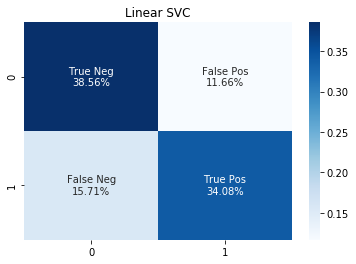

In [166]:
cm = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm/np.sum(cm), xticklabels=["0", "1"], yticklabels=["0", "1"],annot=labels,
            fmt='',cmap='Blues').set_title(name,fontsize=12)

#### CURVES

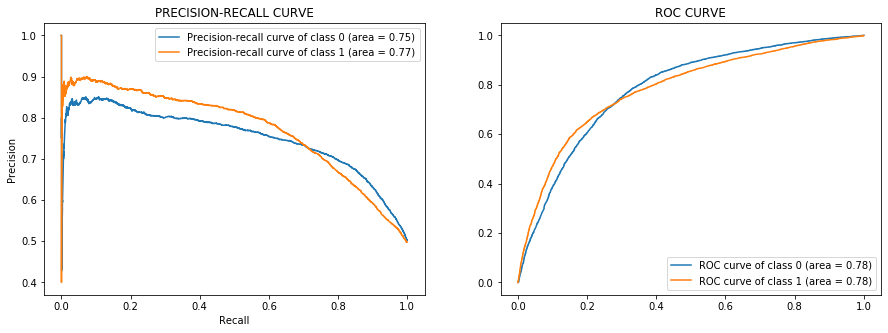

In [167]:
fig, ax = plt.subplots(1, 2,figsize=(15, 5))
n_classes=2
precision = {}
recall = {}
average_precision = {}
# Plot precision-recall curve on the first subplot
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test==i, probs[:, i])
    average_precision[i] = average_precision_score(y_test==i , probs[:, i])
    ax[0].plot(recall[i], precision[i],
               label='Precision-recall curve of class {0} (area = {1:0.2f})'
                     ''.format(i, average_precision[i]))
ax[0].set_xlabel('Recall')
ax[0].set_ylabel('Precision')
ax[0].set_title('PRECISION-RECALL CURVE')
ax[0].legend(loc="upper right")
fpr = {}
tpr = {}
roc_auc = {}
# Plot ROC curve on the second subplot
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    ax[1].plot(fpr[i], tpr[i],
               label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(i, roc_auc[i]))
ax[1].set_title('ROC CURVE')
ax[1].legend()

### 3-KNN

**K-Nearest Neighbors**: K-nearest neighbors (KNN) is a non-parametric algorithm that classifies a sample by identifying its k nearest neighbors in the training set, and then predicting the class that occurs most frequently among them. KNN is simple to implement and efficient to run, and can handle large and high-dimensional datasets.

#### METRICS

#### TUNING HYPERPARAMETERS

In [168]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

hyperparameters = {
    "n_neighbors": [3, 5, 7],
    "weights": ["uniform", "distance"],
    "p": [1, 2, 3]
}

knn_cv = GridSearchCV(knn, hyperparameters, cv=5, scoring="accuracy")

knn_cv.fit(X_train, y_train)

print(knn_cv.best_params_)

{'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


In [170]:
name= 'KNN'
start = time.time()
model = KNeighborsClassifier(n_neighbors=7, p=2, weights='uniform')
scores = cross_val_score(model, X_train, y_train, cv=5,scoring='accuracy')
train_acc = np.mean(scores)
y_pred = cross_val_predict(model, X_test, y_test, cv=5)
test_acc= accuracy_score(y_test, y_pred)
recall= recall_score(y_test, y_pred,average=None)
precision=precision_score(y_test, y_pred,average=None)
F1= f1_score(y_test, y_pred,average=None)
average_precision= average_precision_score(y_test,y_pred)
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)
total = time.time() - start


headers = ["Model", "Train Accuracy", "Test Accuracy", "Recall","Precision","F1","Average precision", "Elapsed Time"]

data_KNN = [name, "{:.3}".format(train_acc), "{:.3}".format(test_acc), "{:.3} {:.3}".format(recall[0],recall[1]),
        "{:.3} {:.3}".format(precision[0],precision[1]), "{:.3} {:.3}".format(F1[0],F1[1]),
        "{:.3}".format(average_precision), "{:.4}".format(total)]


print("{:<18} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10} ".format(*headers))  
print("{:<18} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10}".format(*data_KNN))  

Model              Train Accuracy  Test Accuracy   Recall       Precision    F1           Average precision  Elapsed Time 
KNN                0.7             0.689           0.71 0.667   0.683 0.696  0.696 0.681  0.63               17.01     


#### CONFUSION MATRIX

Text(0.5, 1, 'KNN')

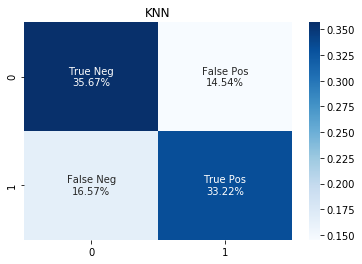

In [171]:
cm = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm/np.sum(cm), xticklabels=["0", "1"], yticklabels=["0", "1"],annot=labels,
            fmt='',cmap='Blues').set_title(name,fontsize=12)

#### CURVES

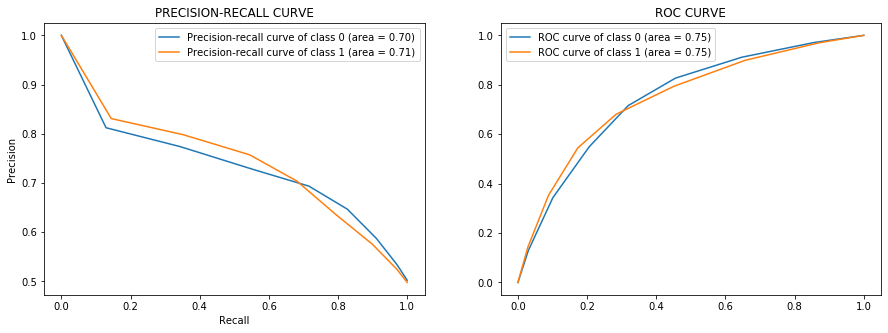

In [172]:
fig, ax = plt.subplots(1, 2,figsize=(15, 5))
n_classes=2
precision = {}
recall = {}
average_precision = {}
# Plot precision-recall curve on the first subplot
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test==i, probs[:, i])
    average_precision[i] = average_precision_score(y_test==i , probs[:, i])
    ax[0].plot(recall[i], precision[i],
               label='Precision-recall curve of class {0} (area = {1:0.2f})'
                     ''.format(i, average_precision[i]))
ax[0].set_xlabel('Recall')
ax[0].set_ylabel('Precision')
ax[0].set_title('PRECISION-RECALL CURVE')
ax[0].legend(loc="upper right")
fpr = {}
tpr = {}
roc_auc = {}
# Plot ROC curve on the second subplot
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    ax[1].plot(fpr[i], tpr[i],
               label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(i, roc_auc[i]))
ax[1].set_title('ROC CURVE')
ax[1].legend()

### 4- NAIVE BAYES

**Naive Bayes**: Naive Bayes is a probabilistic classifier that uses Bayes' theorem to predict the class of a sample, based on the probabilities of the features given the classes. Naive Bayes is simple and fast to train, and can handle high-dimensional and sparse data.

#### TUNING HYPERPARAMETERS

In [173]:
from sklearn.naive_bayes import GaussianNB
hyperparameters = {
    "priors": [None, [0.5, 0.5], [0.25, 0.75]],
    "var_smoothing": [1e-9, 1e-8, 1e-7]
}
model = GaussianNB()
clf = GridSearchCV(model, hyperparameters, cv=5)
clf.fit(X_train, y_train)
print(clf.best_params_)

{'priors': None, 'var_smoothing': 1e-08}


#### METRICS

In [174]:
name= 'Naive Bayes'
start = time.time()
model = GaussianNB(priors=None, var_smoothing=1e-08)
scores = cross_val_score(model, X_train, y_train, cv=5,scoring='accuracy')
train_acc = np.mean(scores)
y_pred = cross_val_predict(model, X_test, y_test, cv=5)
test_acc= accuracy_score(y_test, y_pred)
recall= recall_score(y_test, y_pred,average=None)
precision=precision_score(y_test, y_pred,average=None)
F1= f1_score(y_test, y_pred,average=None)
average_precision= average_precision_score(y_test,y_pred)
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)
total = time.time() - start


headers = ["Model", "Train Accuracy", "Test Accuracy", "Recall","Precision","F1","Average precision", "Elapsed Time"]

data_NB = [name, "{:.3}".format(train_acc), "{:.3}".format(test_acc), "{:.3} {:.3}".format(recall[0],recall[1]),
        "{:.3} {:.3}".format(precision[0],precision[1]), "{:.3} {:.3}".format(F1[0],F1[1]),
        "{:.3}".format(average_precision), "{:.4}".format(total)]


print("{:<18} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10} ".format(*headers))  
print("{:<18} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10}".format(*data_NB))  

Model              Train Accuracy  Test Accuracy   Recall       Precision    F1           Average precision  Elapsed Time 
Naive Bayes        0.679           0.663           0.514 0.813  0.735 0.624  0.605 0.706  0.6                0.2493    


#### CONFUSION MATRIX

Text(0.5, 1, 'Naive Bayes')

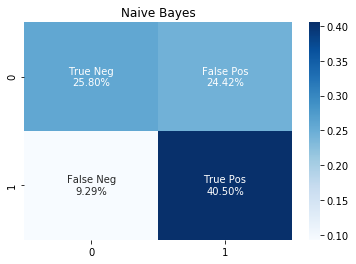

In [175]:
cm = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm/np.sum(cm), xticklabels=["0", "1"], yticklabels=["0", "1"],annot=labels,
            fmt='',cmap='Blues').set_title(name,fontsize=12)

#### CURVES

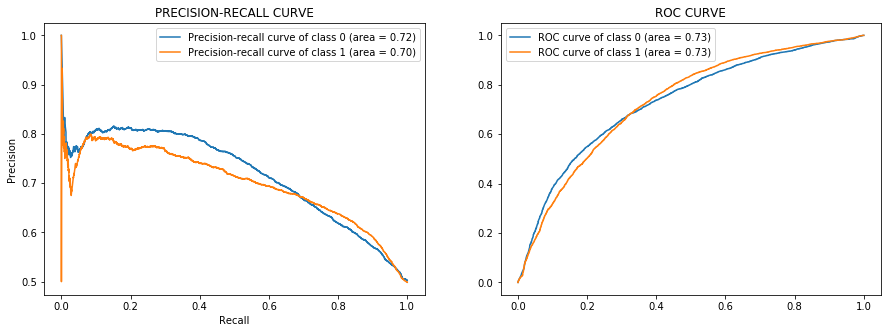

In [176]:
fig, ax = plt.subplots(1, 2,figsize=(15, 5))
n_classes=2
precision = {}
recall = {}
average_precision = {}
# Plot precision-recall curve on the first subplot
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test==i, probs[:, i])
    average_precision[i] = average_precision_score(y_test==i , probs[:, i])
    ax[0].plot(recall[i], precision[i],
               label='Precision-recall curve of class {0} (area = {1:0.2f})'
                     ''.format(i, average_precision[i]))
ax[0].set_xlabel('Recall')
ax[0].set_ylabel('Precision')
ax[0].set_title('PRECISION-RECALL CURVE')
ax[0].legend(loc="upper right")
fpr = {}
tpr = {}
roc_auc = {}
# Plot ROC curve on the second subplot
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    ax[1].plot(fpr[i], tpr[i],
               label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(i, roc_auc[i]))
ax[1].set_title('ROC CURVE')
ax[1].legend()

### 5- RANDOM FOREST

**Random Forest**: A random forest is an ensemble learning method that trains multiple decision trees on random subsets of the data, and then combines their predictions using majority voting. Random forests are widely used for classification tasks, due to their high accuracy and ability to handle large and complex datasets.

#### TUNING HYPERPARAMETERS

In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
hyperparameters = {
    "n_estimators": [10, 50, 100],
    "max_depth": [3, 5, 7],
    "min_samples_leaf": [1, 5]
}
model = RandomForestClassifier()
clf = RandomizedSearchCV(model, hyperparameters, cv=5)
clf.fit(X_train, y_train)
print(clf.best_params_)

{'n_estimators': 100, 'min_samples_leaf': 1, 'max_depth': 5}


#### METRICS

In [178]:
name= 'Random Forest'
start = time.time()
model = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, max_depth=5)
scores = cross_val_score(model, X_train, y_train, cv=5,scoring='accuracy')
train_acc = np.mean(scores)
y_pred = cross_val_predict(model, X_test, y_test, cv=5)
test_acc= accuracy_score(y_test, y_pred)
recall= recall_score(y_test, y_pred,average=None)
precision=precision_score(y_test, y_pred,average=None)
F1= f1_score(y_test, y_pred,average=None)
average_precision= average_precision_score(y_test,y_pred)
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)
total = time.time() - start


headers = ["Model", "Train Accuracy", "Test Accuracy", "Recall","Precision","F1","Average precision", "Elapsed Time"]

data_RF = [name, "{:.3}".format(train_acc), "{:.3}".format(test_acc), "{:.3} {:.3}".format(recall[0],recall[1]),
        "{:.3} {:.3}".format(precision[0],precision[1]), "{:.3} {:.3}".format(F1[0],F1[1]),
        "{:.3}".format(average_precision), "{:.4}".format(total)]


print("{:<18} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10} ".format(*headers))  
print("{:<18} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10}".format(*data_RF))  

Model              Train Accuracy  Test Accuracy   Recall       Precision    F1           Average precision  Elapsed Time 
Random Forest      0.726           0.729           0.788 0.669  0.706 0.758  0.745 0.71   0.672              42.02     


#### CONFUSION MATRIX

Text(0.5, 1, 'Random Forest')

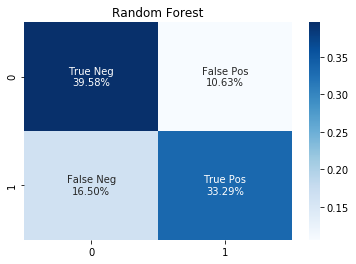

In [179]:
cm = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm/np.sum(cm), xticklabels=["0", "1"], yticklabels=["0", "1"],annot=labels,
            fmt='',cmap='Blues').set_title(name,fontsize=12)

#### CURVES

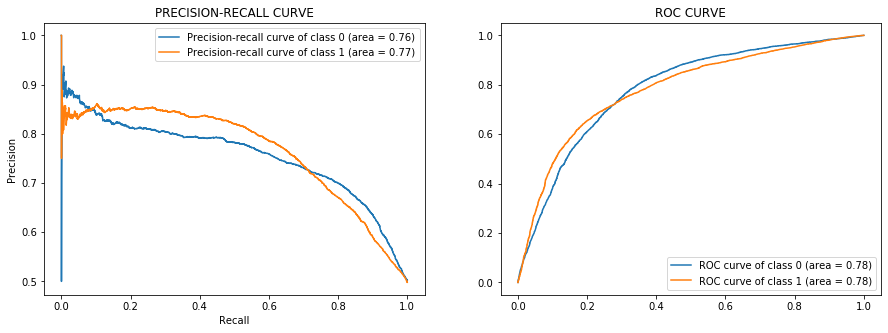

In [180]:
fig, ax = plt.subplots(1, 2,figsize=(15, 5))
n_classes=2
precision = {}
recall = {}
average_precision = {}
# Plot precision-recall curve on the first subplot
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test==i, probs[:, i])
    average_precision[i] = average_precision_score(y_test==i , probs[:, i])
    ax[0].plot(recall[i], precision[i],
               label='Precision-recall curve of class {0} (area = {1:0.2f})'
                     ''.format(i, average_precision[i]))
ax[0].set_xlabel('Recall')
ax[0].set_ylabel('Precision')
ax[0].set_title('PRECISION-RECALL CURVE')
ax[0].legend(loc="upper right")
fpr = {}
tpr = {}
roc_auc = {}
# Plot ROC curve on the second subplot
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    ax[1].plot(fpr[i], tpr[i],
               label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(i, roc_auc[i]))
ax[1].set_title('ROC CURVE')
ax[1].legend()

### 6 - DECISION TREES

**Decision Trees**: Decision trees are a non-parametric learning method that recursively splits the data into subsets based on a decision rule, until the data is sufficiently pure to predict the target variable. Decision trees are easy to interpret and visualize, and can handle both numerical and categorical data.

#### TUNING HYPERPARAMETERS

In [181]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth': [1, 2, 3, 4, 5],
              'min_samples_split': [2, 3, 4, 5],
              'min_samples_leaf': [1, 2, 3, 4, 5]}

clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


#### METRICS

In [182]:
name= 'Decision Tree'
start = time.time()
model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=2)
scores = cross_val_score(model, X_train, y_train, cv=5,scoring='accuracy')
train_acc = np.mean(scores)
y_pred = cross_val_predict(model, X_test, y_test, cv=5)
test_acc= accuracy_score(y_test, y_pred)
recall= recall_score(y_test, y_pred,average=None)
precision=precision_score(y_test, y_pred,average=None)
F1= f1_score(y_test, y_pred,average=None)
average_precision= average_precision_score(y_test,y_pred)
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)
total = time.time() - start


headers = ["Model", "Train Accuracy", "Test Accuracy", "Recall","Precision","F1","Average precision", "Elapsed Time"]

data_DT = [name, "{:.3}".format(train_acc), "{:.3}".format(test_acc), "{:.3} {:.3}".format(recall[0],recall[1]),
        "{:.3} {:.3}".format(precision[0],precision[1]), "{:.3} {:.3}".format(F1[0],F1[1]),
        "{:.3}".format(average_precision), "{:.4}".format(total)]


print("{:<18} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10} ".format(*headers))  
print("{:<18} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10}".format(*data_DT))  

Model              Train Accuracy  Test Accuracy   Recall       Precision    F1           Average precision  Elapsed Time 
Decision Tree      0.728           0.724           0.822 0.624  0.688 0.777  0.749 0.692  0.672              3.669     


#### CONFUSION MATRIX

Text(0.5, 1, 'Decision Tree')

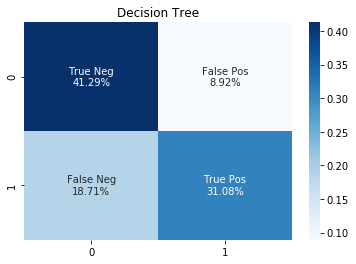

In [183]:
cm = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm/np.sum(cm), xticklabels=["0", "1"], yticklabels=["0", "1"],annot=labels,
            fmt='',cmap='Blues').set_title(name,fontsize=12)

#### CURVES

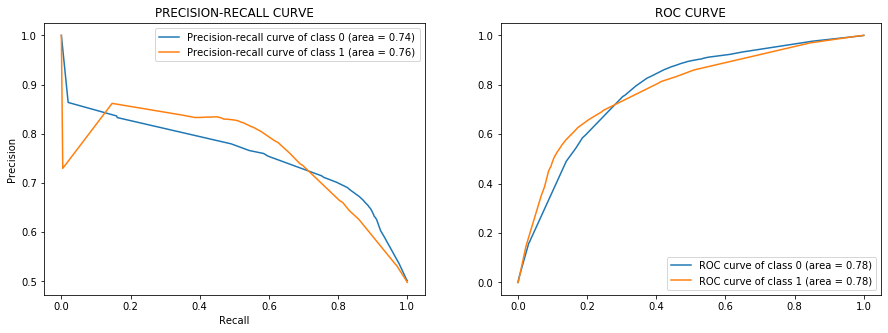

In [184]:
fig, ax = plt.subplots(1, 2,figsize=(15, 5))
n_classes=2
precision = {}
recall = {}
average_precision = {}
# Plot precision-recall curve on the first subplot
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test==i, probs[:, i])
    average_precision[i] = average_precision_score(y_test==i , probs[:, i])
    ax[0].plot(recall[i], precision[i],
               label='Precision-recall curve of class {0} (area = {1:0.2f})'
                     ''.format(i, average_precision[i]))
ax[0].set_xlabel('Recall')
ax[0].set_ylabel('Precision')
ax[0].set_title('PRECISION-RECALL CURVE')
ax[0].legend(loc="upper right")
fpr = {}
tpr = {}
roc_auc = {}
# Plot ROC curve on the second subplot
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    ax[1].plot(fpr[i], tpr[i],
               label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(i, roc_auc[i]))
ax[1].set_title('ROC CURVE')
ax[1].legend()

### 7- STOCHASTIC GRADIENT DESCENT

**Stochastic Gradient Descent (SGD)** is a simple and efficient optimization algorithm for training machine learning models, such as linear classifiers, regression models, and neural networks. It is called "stochastic" because it uses randomness to make decisions, rather than using the entire dataset like other gradient-based optimization algorithms.

#### TUNING HYPERPARAMETERS

In [185]:
from sklearn.linear_model import SGDClassifier
hyperparameters = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'eta0': [0.1, 0.2, 0.3, 0.4, 0.5]
}

sgd_classifier = SGDClassifier()
random_search = RandomizedSearchCV(sgd_classifier,param_distributions=hyperparameters, n_iter=10,  cv=5,  random_state=42)
random_search.fit(X_train, y_train)
print(random_search.best_params_)

{'learning_rate': 'optimal', 'l1_ratio': 0.5, 'eta0': 0.1, 'alpha': 0.1}


#### METRICS

In [186]:
name= 'SGDClassifier'
start = time.time()
model = SGDClassifier(learning_rate='optimal', l1_ratio=0.5, eta0=0.3, alpha=0.1,loss='log')
scores = cross_val_score(model, X_train, y_train, cv=5,scoring='accuracy')
train_acc = np.mean(scores)
y_pred = cross_val_predict(model, X_test, y_test, cv=5)
test_acc= accuracy_score(y_test, y_pred)
recall= recall_score(y_test, y_pred,average=None)
precision=precision_score(y_test, y_pred,average=None)
F1= f1_score(y_test, y_pred,average=None)
average_precision= average_precision_score(y_test,y_pred)
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)
total = time.time() - start


headers = ["Model", "Train Accuracy", "Test Accuracy", "Recall","Precision","F1","Average precision", "Elapsed Time"]

data_SGD = [name, "{:.3}".format(train_acc), "{:.3}".format(test_acc), "{:.3} {:.3}".format(recall[0],recall[1]),
        "{:.3} {:.3}".format(precision[0],precision[1]), "{:.3} {:.3}".format(F1[0],F1[1]),
        "{:.3}".format(average_precision), "{:.4}".format(total)]


print("{:<18} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10} ".format(*headers))  
print("{:<18} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10}".format(*data_SGD))  

Model              Train Accuracy  Test Accuracy   Recall       Precision    F1           Average precision  Elapsed Time 
SGDClassifier      0.701           0.699           0.69 0.708   0.705 0.694  0.697 0.701  0.637              0.572     


#### CONFUSION MATRIX

Text(0.5, 1, 'SGDClassifier')

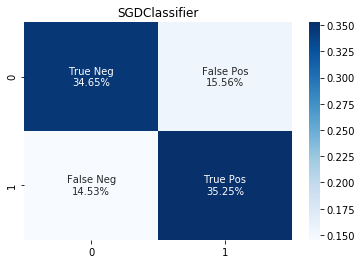

In [187]:
cm = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm/np.sum(cm), xticklabels=["0", "1"], yticklabels=["0", "1"],annot=labels,
            fmt='',cmap='Blues').set_title(name,fontsize=12)

#### CURVES

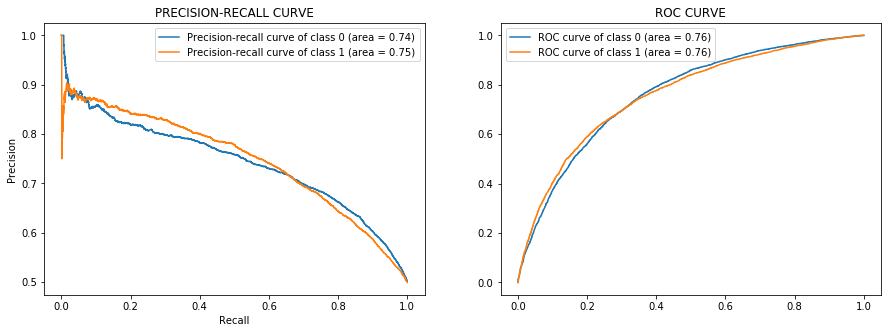

In [188]:
fig, ax = plt.subplots(1, 2,figsize=(15, 5))
n_classes=2
precision = {}
recall = {}
average_precision = {}
# Plot precision-recall curve on the first subplot
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test==i, probs[:, i])
    average_precision[i] = average_precision_score(y_test==i , probs[:, i])
    ax[0].plot(recall[i], precision[i],
               label='Precision-recall curve of class {0} (area = {1:0.2f})'
                     ''.format(i, average_precision[i]))
ax[0].set_xlabel('Recall')
ax[0].set_ylabel('Precision')
ax[0].set_title('PRECISION-RECALL CURVE')
ax[0].legend(loc="upper right")
fpr = {}
tpr = {}
roc_auc = {}
# Plot ROC curve on the second subplot
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    ax[1].plot(fpr[i], tpr[i],
               label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(i, roc_auc[i]))
ax[1].set_title('ROC CURVE')
ax[1].legend()

### 8- LINEAR DISCRIMINANT ANALYSIS

**Linear discriminant analysis (LDA)**: is a machine learning technique used for classification. It is a supervised learning method, which means that it requires a labeled dataset to be trained on. LDA is based on the assumption that the data comes from a Gaussian distribution, and that the classes in the dataset are linearly separable.

#### TUNING HYPERPARAMETERS

In [189]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

hyperparameters = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto', 0.1, 0.2, 0.3, 0.4, 0.5],
}

lda = LinearDiscriminantAnalysis()
grid_search = GridSearchCV(lda,param_grid=hyperparameters,cv=5,n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'shrinkage': None, 'solver': 'svd'}


#### METRICS

In [190]:
name= 'Linear Discriminant'
start = time.time()
model = LinearDiscriminantAnalysis(shrinkage=None, solver='svd')
scores = cross_val_score(model, X_train, y_train, cv=5,scoring='accuracy')
train_acc = np.mean(scores)
y_pred = cross_val_predict(model, X_test, y_test, cv=5)
test_acc= accuracy_score(y_test, y_pred)
recall= recall_score(y_test, y_pred,average=None)
precision=precision_score(y_test, y_pred,average=None)
F1= f1_score(y_test, y_pred,average=None)
average_precision= average_precision_score(y_test,y_pred)
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)
total = time.time() - start


headers = ["Model", "Train Accuracy", "Test Accuracy", "Recall","Precision","F1","Average precision", "Elapsed Time"]

data_LDA = [name, "{:.3}".format(train_acc), "{:.3}".format(test_acc), "{:.3} {:.3}".format(recall[0],recall[1]),
        "{:.3} {:.3}".format(precision[0],precision[1]), "{:.3} {:.3}".format(F1[0],F1[1]),
        "{:.3}".format(average_precision), "{:.4}".format(total)]


print("{:<18} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10} ".format(*headers))  
print("{:<18} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10}".format(*data_LDA))  

Model              Train Accuracy  Test Accuracy   Recall       Precision    F1           Average precision  Elapsed Time 
Linear Discriminant 0.725           0.726           0.768 0.683  0.71 0.745   0.738 0.713  0.667              1.058     


#### CONFUSION MATRIX

Text(0.5, 1, 'Linear Discriminant')

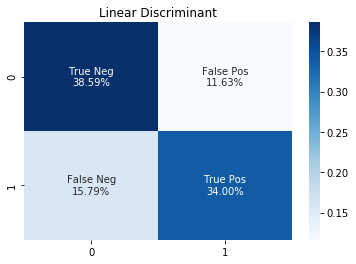

In [191]:
cm = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm/np.sum(cm), xticklabels=["0", "1"], yticklabels=["0", "1"],annot=labels,
            fmt='',cmap='Blues').set_title(name,fontsize=12)

#### CURVES

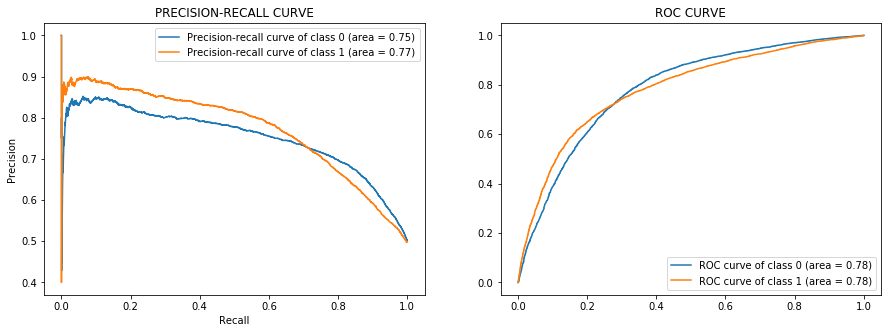

In [192]:
fig, ax = plt.subplots(1, 2,figsize=(15, 5))
n_classes=2
precision = {}
recall = {}
average_precision = {}
# Plot precision-recall curve on the first subplot
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test==i, probs[:, i])
    average_precision[i] = average_precision_score(y_test==i , probs[:, i])
    ax[0].plot(recall[i], precision[i],
               label='Precision-recall curve of class {0} (area = {1:0.2f})'
                     ''.format(i, average_precision[i]))
ax[0].set_xlabel('Recall')
ax[0].set_ylabel('Precision')
ax[0].set_title('PRECISION-RECALL CURVE')
ax[0].legend(loc="upper right")
fpr = {}
tpr = {}
roc_auc = {}
# Plot ROC curve on the second subplot
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    ax[1].plot(fpr[i], tpr[i],
               label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(i, roc_auc[i]))
ax[1].set_title('ROC CURVE')
ax[1].legend()

### 9- XGBOOST

**XGBoost**:Gradient boosting is a machine learning technique that uses ensembles of weak prediction models, such as decision trees, to build a stronger, more accurate model. XGBoost is an implementation of gradient boosting that is optimized for speed and performance, making it a popular choice for training large and complex models on big data.

#### TUNING HYPERPARAMETERS

In [193]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
warnings.simplefilter("ignore")
hyperparameters = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.3, 0.5],
    'n_estimators': [100, 300, 500]
}
xgb_model = XGBClassifier(use_label_encoder=False)
random_search = RandomizedSearchCV(xgb_model, hyperparameters, scoring='accuracy', cv=3, n_jobs=-1, refit=True)
random_search.fit(X_train, y_train)
print("Best hyperparameters:", random_search.best_params_)

[19:12:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best hyperparameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}


#### METRICS

In [194]:
name= 'XGBoost'
start = time.time()
model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.10,use_label_encoder=False,objective='binary:logistic',eval_metric='error')
scores = cross_val_score(model, X_train, y_train, cv=5,scoring='accuracy')
train_acc = np.mean(scores)
y_pred = cross_val_predict(model, X_test, y_test, cv=5)
test_acc= accuracy_score(y_test, y_pred)
recall= recall_score(y_test, y_pred,average=None)
precision=precision_score(y_test, y_pred,average=None)
F1= f1_score(y_test, y_pred,average=None)
average_precision= average_precision_score(y_test,y_pred)
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)
total = time.time() - start


headers = ["Model", "Train Accuracy", "Test Accuracy", "Recall","Precision","F1","Average precision", "Elapsed Time"]

data_XGB = [name, "{:.3}".format(train_acc), "{:.3}".format(test_acc), "{:.3} {:.3}".format(recall[0],recall[1]),
        "{:.3} {:.3}".format(precision[0],precision[1]), "{:.3} {:.3}".format(F1[0],F1[1]),
        "{:.3}".format(average_precision), "{:.4}".format(total)]


print("{:<18} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10} ".format(*headers))  
print("{:<18} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10}".format(*data_XGB))  

Model              Train Accuracy  Test Accuracy   Recall       Precision    F1           Average precision  Elapsed Time 
XGBoost            0.73            0.727           0.785 0.669  0.705 0.755  0.743 0.71   0.67               35.08     


#### CONFUSION MATRIX

Text(0.5, 1, 'XGBoost')

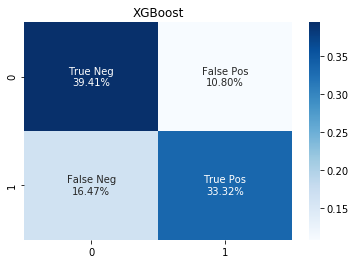

In [195]:
cm = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm/np.sum(cm), xticklabels=["0", "1"], yticklabels=["0", "1"],annot=labels,
            fmt='',cmap='Blues').set_title(name,fontsize=12)

#### CURVES

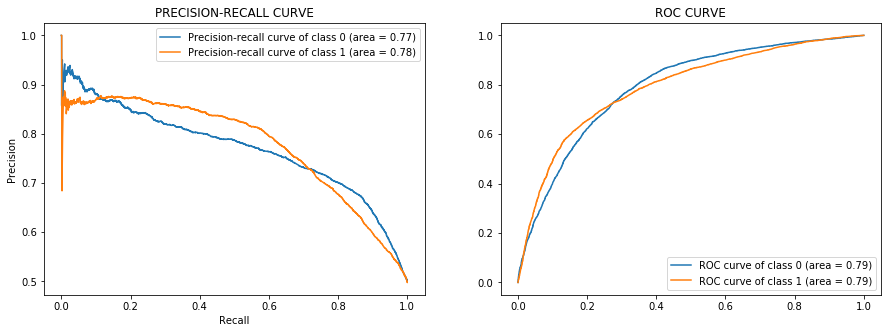

In [196]:
fig, ax = plt.subplots(1, 2,figsize=(15, 5))
n_classes=2
precision = {}
recall = {}
average_precision = {}
# Plot precision-recall curve on the first subplot
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test==i, probs[:, i])
    average_precision[i] = average_precision_score(y_test==i , probs[:, i])
    ax[0].plot(recall[i], precision[i],
               label='Precision-recall curve of class {0} (area = {1:0.2f})'
                     ''.format(i, average_precision[i]))
ax[0].set_xlabel('Recall')
ax[0].set_ylabel('Precision')
ax[0].set_title('PRECISION-RECALL CURVE')
ax[0].legend(loc="upper right")
fpr = {}
tpr = {}
roc_auc = {}
# Plot ROC curve on the second subplot
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    ax[1].plot(fpr[i], tpr[i],
               label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(i, roc_auc[i]))
ax[1].set_title('ROC CURVE')
ax[1].legend()

### 10- PERCEPTRON

**Perceptron:** A perceptron is a simple type of artificial neural network that is often used as the building block for more complex neural network architectures. It consists of a single layer of neurons, or "nodes," which are connected to the input data by weights. The perceptron uses these weights to compute a weighted sum of the input data and applies a non-linear activation function to this sum to produce a binary output.

#### TUNING HYPERPARAMETERS

In [197]:
from sklearn.linear_model import Perceptron
hyperparameters = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}
perceptron_model = Perceptron()
grid_search = GridSearchCV(perceptron_model, hyperparameters)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'alpha': 0.001}


#### METRICS

In [198]:
name= 'Perceptron'
start = time.time()
model = Perceptron(alpha=0.001)
scores = cross_val_score(model, X_train, y_train, cv=5,scoring='accuracy')
train_acc = np.mean(scores)
y_pred = cross_val_predict(model, X_test, y_test, cv=5)
test_acc= accuracy_score(y_test, y_pred)
recall= recall_score(y_test, y_pred,average=None)
precision=precision_score(y_test, y_pred,average=None)
F1= f1_score(y_test, y_pred,average=None)
average_precision= average_precision_score(y_test,y_pred)
total = time.time() - start


headers = ["Model", "Train Accuracy", "Test Accuracy", "Recall","Precision","F1","Average precision", "Elapsed Time"]

data_PC = [name, "{:.3}".format(train_acc), "{:.3}".format(test_acc), "{:.3} {:.3}".format(recall[0],recall[1]),
        "{:.3} {:.3}".format(precision[0],precision[1]), "{:.3} {:.3}".format(F1[0],F1[1]),
        "{:.3}".format(average_precision), "{:.4}".format(total)]


print("{:<18} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10} ".format(*headers))  
print("{:<18} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10}".format(*data_PC))  

Model              Train Accuracy  Test Accuracy   Recall       Precision    F1           Average precision  Elapsed Time 
Perceptron         0.637           0.622           0.67 0.573   0.613 0.633  0.64 0.601   0.575              0.3473    


#### CONFUSION MATRIX

Text(0.5, 1, 'Perceptron')

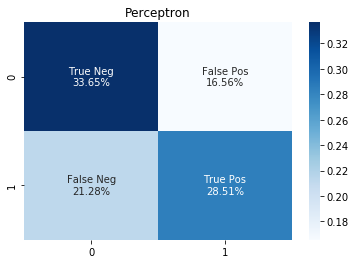

In [199]:
cm = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm/np.sum(cm), xticklabels=["0", "1"], yticklabels=["0", "1"],annot=labels,
            fmt='',cmap='Blues').set_title(name,fontsize=12)

### MODELS RESUME

#### ALL FEATURES

In [200]:
headers = ["Model", "Train Accuracy", "Test Accuracy", "Recall","Precision","F1","Average precision", "Elapsed Time"]
print("{:<20} {:<15} {:<15} {:<12} {:<12} {:<12} {:<17} {:<10}".format(*headers))  
print("{:<20} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10}".format(*data_log))  
print("{:<20} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10}".format(*data_svc))  
print("{:<20} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10}".format(*data_KNN))  
print("{:<20} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10}".format(*data_NB))  
print("{:<20} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10}".format(*data_RF))  
print("{:<20} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10}".format(*data_DT))  
print("{:<20} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10}".format(*data_SGD))
print("{:<20} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10}".format(*data_LDA))  
print("{:<20} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10}".format(*data_XGB))
print("{:<20} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10}".format(*data_PC))

Model                Train Accuracy  Test Accuracy   Recall       Precision    F1           Average precision Elapsed Time
Logistic Regression  0.726           0.728           0.767 0.689  0.713 0.745  0.739 0.716  0.668              1.575     
Linear SVC           0.725           0.726           0.768 0.684  0.71 0.745   0.738 0.713  0.667              32.36     
KNN                  0.7             0.689           0.71 0.667   0.683 0.696  0.696 0.681  0.63               17.01     
Naive Bayes          0.679           0.663           0.514 0.813  0.735 0.624  0.605 0.706  0.6                0.2493    
Random Forest        0.726           0.729           0.788 0.669  0.706 0.758  0.745 0.71   0.672              42.02     
Decision Tree        0.728           0.724           0.822 0.624  0.688 0.777  0.749 0.692  0.672              3.669     
SGDClassifier        0.701           0.699           0.69 0.708   0.705 0.694  0.697 0.701  0.637              0.572     
Linear Discriminant  0.

Our best model according to Test accuracy is Random Forest with an accuracy of 72.9%

#### FEATURE SELECTION: RFE

In [155]:
headers = ["Model", "Train Accuracy", "Test Accuracy", "Recall","Precision","F1","Average precision", "Elapsed Time"]
print("{:<20} {:<15} {:<15} {:<12} {:<12} {:<12} {:<17} {:<10}".format(*headers))  
print("{:<20} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10}".format(*data_log_RFE))  
print("{:<20} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10}".format(*data_svc_RFE))  
print("{:<20} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10}".format(*data_KNN_RFE))  
print("{:<20} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10}".format(*data_NB_RFE))  
print("{:<20} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10}".format(*data_RF_RFE))  
print("{:<20} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10}".format(*data_DT_RFE))  
print("{:<20} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10}".format(*data_SGD_RFE))
print("{:<20} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10}".format(*data_LDA_RFE))  
print("{:<20} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10}".format(*data_XGB_RFE))
print("{:<20} {:<15} {:<15} {:<12} {:<12} {:<12} {:<18} {:<10}".format(*data_PC_RFE))

Model                Train Accuracy  Test Accuracy   Recall       Precision    F1           Average precision Elapsed Time
Logistic Regression  0.722           0.723           0.807 0.636  0.693 0.764  0.746 0.694  0.667              0.4561    
Linear SVC           0.722           0.724           0.825 0.62   0.689 0.777  0.751 0.69   0.67               21.2      
KNN                  0.7             0.699           0.733 0.665  0.69 0.71    0.711 0.686  0.638              2.629     
Naive Bayes          0.712           0.715           0.863 0.565  0.669 0.802  0.754 0.663  0.669              0.177     
Random Forest        0.724           0.726           0.809 0.641  0.696 0.767  0.748 0.698  0.67               18.02     
Decision Tree        0.725           0.725           0.826 0.622  0.69 0.779   0.752 0.692  0.672              0.6067    
SGDClassifier        0.684           0.702           0.706 0.699  0.705 0.7    0.705 0.699  0.638              0.4458    
Linear Discriminant  0.

Our best model according to Test Accuracy is XGBoost with an accuracy of 72.7%. 

### CONCLUSIONS

We have analyzed this cardiovascular disease dataset from kaggle and we have trained different models in order to classify if a person has a cardio disease. 

Unfortunately, we have not obtained a very good accuracy, despite of we have followed all the correct steps and we have created very different models. The main reason for that is that the original dataset doesn't have attributes that are strongly correlated with the target value 'cardio'. 

In order to solve that, we have done Feature Engineering and we have created new attributes like BMI but it has not been enough. The feature selection has helped us to reduce possible cases of overfitting, but it has not significantly improved the accuracy either. 

In our models resume, we can see that the best classifier for all features is Random Forest and with the features systolic blood pressure (ap_hi), well_above_cholesterol and old. With accuracies of 72.9% and 72.7& respectively. Random Forest and XGBoost are ensemble learning methods, which means that they use multiple individual models to make predictions. These individual models are decision trees used to make predictions and combine the predictions of the individual trees to produce a final prediction.

Future work: if we have more time to work on this dataset we will focuse on trying to create new features from our originals that have a strong relationship with the target feature 'cardio'. This will help us in the future to generate more accurate classifier models.